In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
 


In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip
 


--2020-07-28 00:35:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.28MB/s    in 39s     

2020-07-28 00:36:37 (7.81 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)
 


In [15]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical',
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical',
        subset='validation')
 


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
 


In [17]:
model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
 
history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)
 

Epoch 1/20
15/15 - 66s - loss: 2.0032 - accuracy: 0.3289 - val_loss: 1.0963 - val_accuracy: 0.3187
Epoch 2/20
15/15 - 70s - loss: 1.1601 - accuracy: 0.3396 - val_loss: 1.0952 - val_accuracy: 0.3750
Epoch 3/20
15/15 - 69s - loss: 1.0926 - accuracy: 0.3646 - val_loss: 1.8279 - val_accuracy: 0.3562
Epoch 4/20
15/15 - 69s - loss: 1.2817 - accuracy: 0.3958 - val_loss: 1.0607 - val_accuracy: 0.3875
Epoch 5/20
15/15 - 69s - loss: 1.0531 - accuracy: 0.4812 - val_loss: 0.8156 - val_accuracy: 0.7312
Epoch 6/20
15/15 - 71s - loss: 0.8975 - accuracy: 0.6562 - val_loss: 0.8327 - val_accuracy: 0.5875
Epoch 7/20
15/15 - 66s - loss: 0.8007 - accuracy: 0.6644 - val_loss: 0.5265 - val_accuracy: 0.8062
Epoch 8/20
15/15 - 65s - loss: 0.6852 - accuracy: 0.7689 - val_loss: 0.4159 - val_accuracy: 0.8562
Epoch 9/20
15/15 - 73s - loss: 0.3768 - accuracy: 0.8667 - val_loss: 0.6715 - val_accuracy: 0.7000
Epoch 10/20
15/15 - 69s - loss: 0.3991 - accuracy: 0.8583 - val_loss: 0.3211 - val_accuracy: 0.8687
Epoch 11/

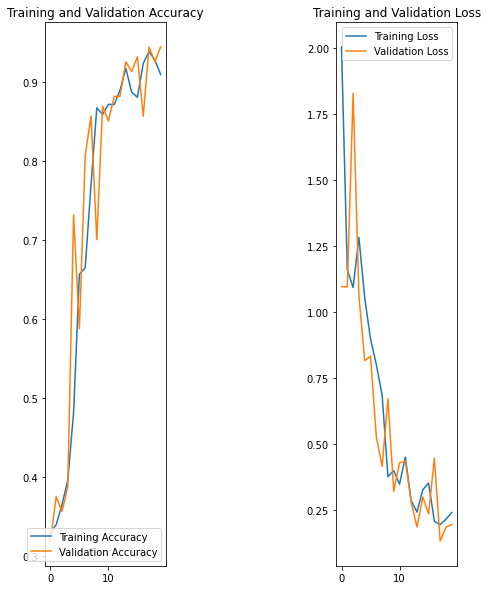

In [18]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 4, 3)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving IMG_20200723_203810_HDR.jpg to IMG_20200723_203810_HDR.jpg
IMG_20200723_203810_HDR.jpg
paper


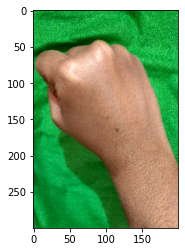

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(300, 200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0][0] == 1:
    print("paper")
  elif classes[0][1] == 1:
    print("rock")
  else:
    print('scissoors')